<a href="https://colab.research.google.com/github/binliu0630/Deep_Learning/blob/master/pytorch_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [0]:
# import 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


In [4]:
# check pytorch version

print(torch.__version__)

1.2.0+cu92


In [5]:
# load the data

BATCH_SIZE = 32

transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)


  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 21375867.19it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


32768it [00:00, 449955.65it/s]
  1%|          | 16384/1648877 [00:00<00:11, 140956.67it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 7359355.61it/s]                           
8192it [00:00, 186613.98it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [37]:
print(trainset)
print(testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


Image batch dim: torch.Size([32, 1, 28, 28])
Label batch dim: torch.Size([32])


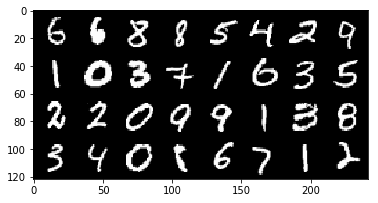

In [38]:
# exploring the data

def imshow(img):
  #img = img/2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  
  
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(f'Image batch dim: {images.shape}')
print(f'Label batch dim: {labels.shape}')

imshow(torchvision.utils.make_grid(images))



In [0]:
# define model

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    # layers
    self.d1 = nn.Linear(28*28, 128)
    self.dropout = nn.Dropout(p=0.2)
    self.d2 = nn.Linear(128, 10)
    
    #computations
  def forward(self, x):
    x = x.flatten(start_dim=1)
    x = self.d1(x)
    x = F.relu(x)
    x = self.dropout(x)
    logit = self.d2(x)
    out = F.softmax(logit, dim=1)
    return out

In [40]:
# test with 1 batch

model = MyModel()
for images, labels in trainloader:
  out = model(images)
  print(out[0])
  print(out.shape)
  break

tensor([0.0934, 0.1001, 0.1066, 0.0914, 0.1049, 0.1096, 0.0914, 0.0967, 0.1013,
        0.1046], grad_fn=<SelectBackward>)
torch.Size([32, 10])


In [0]:
# training the model

learning_rate = 0.001
num_epochs = 5

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
def get_accuracy(output, target, batch_size):
  corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
  accuracy = 100.0 * corrects/batch_size
  return accuracy.item()

KeyboardInterrupt: ignored

In [58]:
for epoch in range(num_epochs):
  train_running_loss = 0.0
  train_acc = 0.0
  test_running_loss = 0.0
  test_acc = 0.0
  
  model = model.train()
  for i, (images, labels) in enumerate(trainloader):
    images = images.to(device)
    labels = labels.to(device)
    predictions = model(images)
    loss = criterion(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step() # update model parameters
    train_running_loss += loss.detach().item()
    train_acc += get_accuracy(predictions, labels, BATCH_SIZE)
  
  for r, (images, labels) in enumerate(testloader):
    images = images.to(device)
    labels = labels.to(device)
    predictions = model(images)
    loss = criterion(predictions, labels)
    test_running_loss += loss.detach().item()
    test_acc += get_accuracy(predictions, labels, BATCH_SIZE)
    
  model.eval()
  print(f'Epoch: {epoch:.2f}, Train Loss: {train_running_loss/i:.2f}, Train Accuracy: {train_acc/i:.2f}, Test Loss: {test_running_loss/r:.2f}, Test Accuracy: {test_acc/r:.2f}')
 

Epoch: 0.00, Train Loss: 1.48, Train Accuracy: 97.93, Test Loss: 1.50, Test Accuracy: 96.72
Epoch: 1.00, Train Loss: 1.48, Train Accuracy: 97.94, Test Loss: 1.49, Test Accuracy: 96.95
Epoch: 2.00, Train Loss: 1.48, Train Accuracy: 98.07, Test Loss: 1.49, Test Accuracy: 97.17
Epoch: 3.00, Train Loss: 1.48, Train Accuracy: 98.08, Test Loss: 1.49, Test Accuracy: 97.09
Epoch: 4.00, Train Loss: 1.48, Train Accuracy: 98.15, Test Loss: 1.50, Test Accuracy: 96.79
